<a href="https://colab.research.google.com/github/naincyjoshi/DSData/blob/master/image_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import shutil

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!nvidia-smi

Sat Nov 27 10:45:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |    399MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 24 kB/s 


In [5]:
!apt-get install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


!pip install keras

In [6]:
!pip install keras

In [20]:
# import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from Keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from IPython.display import Image, display

In [21]:
# resize all the image to same size
Imaze_SIZE = [224,224]
train_path = "/content/drive/MyDrive/Hindu paper/Dataset/Train_data"
test_path = "/content/drive/MyDrive/Hindu paper/Dataset/Test_data"

# Import the Inception V3 library as shown below and ass preprocesing layer to the front of VGG
# Here we will be using imagenet weights

inception= InceptionV3(input_shape=Imaze_SIZE + [3], weights='imagenet', include_top=False)

In [22]:
# Don't train the existing weights
for layer in inception.layers:
  layer.trainable= False

In [23]:
# useful for g 
folders = glob('/content/drive/MyDrive/Hindu paper/Dataset/Train_data/*')
folders

['/content/drive/MyDrive/Hindu paper/Dataset/Train_data/Jeans',
 '/content/drive/MyDrive/Hindu paper/Dataset/Train_data/Saree',
 '/content/drive/MyDrive/Hindu paper/Dataset/Train_data/Trousers']

In [25]:
# our layers- we can add more if we want
x = Flatten()(inception.output)

In [27]:
prediction = Dense(len(folders),activation='softmax')(x)

In [28]:
# create a model Object
model = Model(inputs=inception.input,outputs=prediction)

In [29]:
# View the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [30]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
# use the ImageDataGenerator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
# make sure that we provide the same target size as initiated for the imaze size
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Hindu paper/Dataset/Train_data',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')



Found 164 images belonging to 3 classes.


In [34]:
training_set.class_indices

{'Jeans': 0, 'Saree': 1, 'Trousers': 2}

In [35]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Hindu paper/Dataset/Test_data',
                                            target_size=(224,224),
                                            batch_size=16,
                                            class_mode='categorical')

Found 38 images belonging to 3 classes.


In [36]:
#fit the model
#Run the cell .It will take some time to execute
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=10,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
6/6 [==============================] - 52s 5s/step - loss: 7.0536 - accuracy: 0.6341 - val_loss: 2.3629 - val_accuracy: 0.6842
Epoch 2/10
6/6 [==============================] - 3s 497ms/step - loss: 2.1868 - accuracy: 0.7622 - val_loss: 0.6555 - val_accuracy: 0.9211
Epoch 3/10
6/6 [==============================] - 3s 499ms/step - loss: 1.1493 - accuracy: 0.8537 - val_loss: 0.3418 - val_accuracy: 0.8947
Epoch 4/10
6/6 [==============================] - 3s 507ms/step - loss: 0.8040 - accuracy: 0.9085 - val_loss: 0.4228 - val_accuracy: 0.8947
Epoch 5/10
6/6 [==============================] - 3s 490ms/step - loss: 0.6834 - accuracy: 0.8902 - val_loss: 0.2930 - val_accuracy: 0.9474
Epoch 6/10
6/6 [==============================] - 3s 494ms/step - loss: 0.4325 - accuracy: 0.9451 - val_loss: 0.0421 - val_accuracy: 0.9737
Epoch 7/10
6/6 [==============================] - 3s 494ms/step - loss: 0.2682 - accuracy: 0.9268 - val_loss: 0.0474 - val_accuracy: 0.9737
Epoch 8/10
6/6 [======

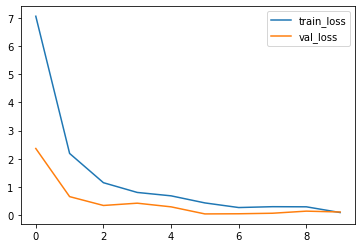

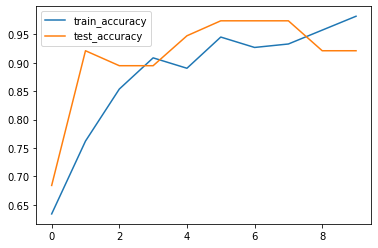

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy

plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy over Epochs')



In [39]:
# Save the Model

model.save('model_vgg16_ImageClassificationcomplete')
model.save('model_vgg16_tf',save_format='tf')
model.save('model_vgg16.h5')

INFO:tensorflow:Assets written to: model_vgg16_ImageClassificationcomplete/assets
INFO:tensorflow:Assets written to: model_vgg16_tf/assets
